# Simulación
# Capítulo 3: Métodos de Construcción de Cópulas
## Sección 1: Método de Inversión

### Distribución Exponencial Bivariada de Marshall-Olkin

La distribución exponencial bivariada de Marshall-Olkin es una extensión de la distribución exponencial, comunmente utilizada para modelar tiempos de supervivencia. La distribución de Marshall-Olkin es útil para describir la dependencia entre componentes en un sistema de dos componentes con el fin de desarrollar procedimientos de inferencia estadística.

Si se denota por $X$ y $Y$ los tiempos de vida de componentes $1$ y $2$, sujetos a choques que hacen fallar al componente $1$, $2$, y a ambos, donde los tiempos de choque son exponenciales independientes $Z_1 \sim \exp(\lambda_1)$, $Z_2 \sim \exp(\lambda_2)$, $Z_{12} \sim \exp(\lambda_{12})$, entonces la función de supervivencia conjunta del vector aleatorio $(X,Y)$ está dada por 

$$
\mathbb{P}(X> x, Y > y) = \bar{H}(x,y) = \exp(-(\lambda_1 + \lambda_{12})x -(\lambda_2 + \lambda_{12})y + \lambda_{12} \min(x,y) )
$$

de donde $X\sim \exp(\lambda_1 + \lambda_{12})$ y $Y \sim \exp(\lambda_2 + \lambda_{12})$. $X$ y $Y$ pueden escribirse en términos de los tiempos exponenciales de choque con los que se calculó la función de supervivencia, como $X=\min(Z_1,Z_{12})$ y $Y=\min(Z_2,Z_{12})$. Esto concuerda con las distribuciones marginales de $X$ y $Y$, ya que el mínimo de exponenciales independientes distribuye exponencial con parámetro igual a la suma de las $\lambda$'s.

Sean $\alpha = \frac{\lambda_{12}}{\lambda_1 + \lambda_{12}}$ y $\beta = \frac{\lambda_{12}}{\lambda_2 + \lambda_{12}}$. Entonces $0<\alpha,\beta<1$ y la cópula de supervivencia obtenida por el método de inversión está dada por

$$
\hat{C}(u,v) = \min(u^{1-\alpha}v,uv^{1-\beta}), \qquad (u,v) \in I^2
$$

Es posible extender los valores de $\alpha$ y $\beta$ al intervalo $[0,1]$ y obtener así la cópula de Marshall-Olkin:

$$
C_{\alpha,\beta}(u,v) = \min(u^{1-\alpha}v,uv^{1-\beta}) = \begin{cases}
u^{1-\alpha}v, \qquad u^\alpha\geq v^\beta\\
uv^{1-\beta}, \qquad u^\alpha\leq v^\beta\\
\end{cases}, \qquad (u,v) \in I^2
$$

con $0\leq \alpha,\beta \leq 1$ los parámetros de la distribución.

A continuación se presentan distintas simulaciones de valores de distribuciones en $I^2$ correspondientes a la cópula de Marshall-Olkin para distintos valores de $0 < \alpha,\beta < 1$

Los casos en que $\alpha=0$ o $\beta=0$ dan como resultado la cópula $\Pi$, mientras que $C_{1,1} = M$.

Si $0<\alpha,\beta<1$, pueden simularse primero valores de la distribución exponencial bivariada de Marshall-Olkin usando la expresión de $X$ y $Y$ como mínimos de exponenciales independientes mostrada arriba.

Para muestrear de una exponencial, se utiliza el hecho de que si $U \sim Unif(0,1)$ y $X$ es una variable aleatoria con función de distribución $F$, entonces $F^{(-1)}(U) \stackrel{d}{=} X$.

En el caso de que $X\sim \exp(\lambda)$, se tiene que $F(x) = 1-\exp(-\lambda x)$ y por tanto $F^{(-1)}(u) = \frac{-\log(1-u)}{\lambda}$. 

Usando que si $U\sim(0,1)$ entonces $1-U \sim Unif(0,1)$, podemos simular números exponenciales a partir de $\frac{-\log(U)}{\lambda}$.

In [2]:
#funcion para muestrear n exponenciales independientes de parametro lambda>0
expon = function(n,lambda){
    return(-log(runif(n))/lambda)
}

Usando las expresiones de $X$ y $Y$ como mínimos, pueden entonces generarse observaciones del vector aleatorio $(X,Y)$ de la distribución exponencial bivariada de Marshall-Olkin, con parametros $\lambda_1, \lambda_2, \lambda_{12}$, siguiendo los pasos a continuación:
* Simular $ u_1, u_2, u_{12}$ a partir de la distribución $Unif(0,1)$.
* Transformar a números exponenciales $z_1 = \frac{-\log(u_1)}{\lambda_1}$, $z_2 = \frac{-\log(u_2)}{\lambda_2}$ y $z_{12} = \frac{-\log(u_{12})}{\lambda_{12}}$.
* Tomar los mínimos correspondientes, haciendo $x=\min(z_1,z_{12})$ y $y=\min(z_2,z_{12})$

In [84]:
#función para simular n observaciones del vector aleatorio (X,Y) ~ ExponencialBivariada(lambda1,lambda2,lambda12)
MarshOlkExp = function(n,lambda1,lambda2,lambda12){
    z1 = expon(n,lambda1)
    z2 = expon(n,lambda2)
    z12 = expon(n,lambda12)
    df = data.frame(z1,z2,z12)
    x = apply(df[c("z1","z12")],FUN=min,MARGIN=1)
    y = apply(df[c("z2","z12")],FUN=min,MARGIN=1)
    return(data.frame(x,y))
}

Una vez teniendo una manera de simular valores de la distribución exponencial bivariada, se aplican las transformaciones

$$
u = \exp(-(\lambda_1 + \lambda_{12})x), \qquad v = \exp(-(\lambda_2 + \lambda_{12})y)
$$

Nótese que bajo esta transformación, usando propiedades de logaritmo y el hecho de que es una función creciente y que por tanto puede intercambiarse con el mínimo, las variables aleatorias $U$ y $V$ satisfacen que para $(u,v)\in I^2$

$$
\mathbb{P}(U\leq u , V\leq v  ) = \mathbb{P}(\exp(-(\lambda_1 + \lambda_{12})X \leq u, \exp(-(\lambda_2 + \lambda_{12})Y \leq v  ) = \mathbb{P}\left(X\geq \frac{-\log(u)}{\lambda_1 + \lambda_{12}},Y\geq \frac{-\log(v)}{\lambda_2 + \lambda_{12}}\right)
$$

$$
= \bar{H}\left(\frac{-\log(u)}{\lambda_1 + \lambda_{12}},\frac{-\log(v)}{\lambda_2 + \lambda_{12}}\right) = \exp\left(\log(u) + \log(v) + \lambda_{12}\min\left(\frac{-\log(u)}{\lambda_1 + \lambda_{12}},\frac{-\log(v)}{\lambda_2 + \lambda_{12}}\right)\right)
$$

$$
= uv\min(u^{-\alpha},v^{-\beta}) = \min(u^{1-\alpha}v,uv^{1-\beta}) = C_{\alpha,\beta}(u,v)
$$

Y por tanto, las transformaciones $u = \exp(-(\lambda_1 + \lambda_{12})x)$ y  $v = \exp(-(\lambda_2 + \lambda_{12})y)$ producen muestras de uniformes estándar con función de distribución conjunta $C_{\alpha,\beta}$.

In [86]:
#función para simular n observaciones de la cópula de Marshall-Olkin con alfa = lambda12/ (lambda1 + lambda12)
#y beta = lambda12/(lambda2 + lambda12)
MarshOlkCopula = function(n,lambda1,lambda2,lambda12){
    M = MarshOlkExp(n,lambda1,lambda2,lambda12)
    M$x = exp(-(lambda1 + lambda12)*M$x)
    M$y = exp(-(lambda2 + lambda12)*M$y)
    colnames(M) = c("u","v")
    return(M)
}

De las expresiones para $\alpha$ y $\beta$ se tiene que 

$$
\dfrac{\lambda_1}{\lambda_{12}} = \dfrac{1-\alpha}{\alpha}, \qquad \dfrac{\lambda_2}{\lambda_{12}} = \dfrac{1-\beta}{\beta}
$$

De manera que si se fija $\lambda_{12}=1$ se tiene que

$$
\lambda_1 = \dfrac{1-\alpha}{\alpha}, \qquad \lambda_2 = \dfrac{1-\beta}{\beta}
$$

Así, se pueden simular muestras de la cópula $C_{\alpha,\beta}$ con $0<\alpha,\beta<1$ a partir del procedimiento descrito.

En los siguientes gráficos se muestran simulaciones de 1000 observaciones de la cópula $C{\alpha,\beta}$ para los siguienes casos: 

* $\alpha=\frac{1}{2},\beta=\frac{1}{2}$

* $\alpha=\frac{2}{3},\beta=\frac{1}{2}$

* $\alpha=\frac{1}{3},\beta=\frac{3}{4}$

* $\alpha=0.2,\beta=0.85$

* $\alpha=0.6,\beta=0.001$

* $\alpha=0.999,\beta=0.999$

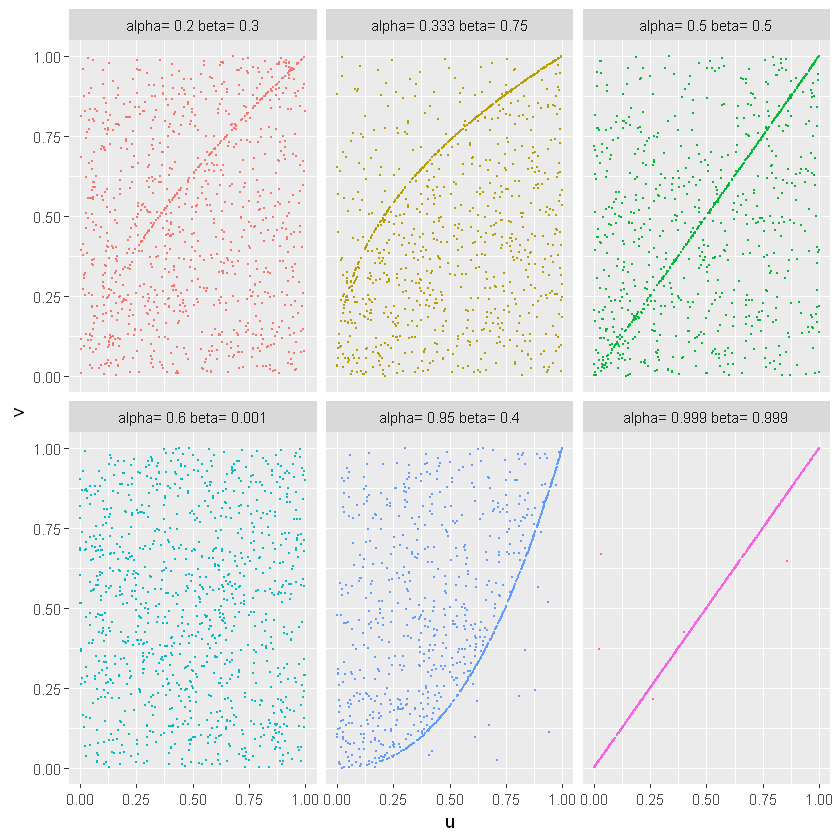

In [249]:
#gráficas
set.seed(10)
n=1000
library(ggplot2)
alpha = c(1/2,0.95,1/3,0.2,0.6,0.999)
beta = c(1/2,2/5,3/4,0.3,0.001,0.999)
M = data.frame()
sing_estim = numeric(length(alpha))
sing_teo = numeric(length(alpha))
f = Vectorize(all.equal.numeric)
for(i in 1:length(alpha)){
    s = rep(paste("alpha=",round(alpha[i],3),"beta=",round(beta[i],3)),n)
    df = MarshOlkCopula(n,(1-alpha[i])/alpha[i],(1-beta[i])/beta[i],1)
    df$parametros = s
    sing_estim[i] = mean(f((df$u)^alpha[i],(df$v)^beta[i])==T)
    sing_teo[i] = alpha[i]*beta[i]/(alpha[i] + beta[i] - (alpha[i]*beta[i]))
    M = rbind(M,df)    
}
sing = data.frame("Parametros"=unique(M$parametros),"ComponenteSingular"=sing_teo,"EstimComponenteSingular"=sing_estim)                                  
ggplot(M) + geom_point(aes(x=u,y=v,colour=parametros),size=.3) + facet_wrap(~parametros) + theme(legend.position = "none")

En los scatterplots para las distintas combinaciones de parámetros puede apreciarse qué sucede al variar $\alpha$ y $\beta$, así como las combinaciones que se acercan a casos especiales de la cópula con $\alpha=0$ o $\beta=0$, $\alpha=1$ o $\beta=1$ (no ambos) y $\alpha=\beta=1$. Estos casos y las cópulas resultantes son mostrados cuidadosamente en la parte escrita.

La siguiente tabla muestra en la primera columna la masa de la componente singular, dada por

$$
\mathbb{P}(U^{\alpha}=V^{\beta})=S_{\alpha,\beta}(1,1)=\dfrac{\alpha\beta}{\alpha+\beta-\alpha\beta}
$$

mientras que en la segunda columna se muestran las masas estimadas a través de la proporción de puntos que cumplen la igualdad. Como se trata sólo de 1000 puntos, la estimación no es necesariamente tan cercana al valor teórico.

In [250]:
sing

Parametros,ComponenteSingular,EstimComponenteSingular
alpha= 0.5 beta= 0.5,0.3333333333,0.342
alpha= 0.95 beta= 0.4,0.3917525773,0.412
alpha= 0.333 beta= 0.75,0.3000000000,0.292
alpha= 0.2 beta= 0.3,0.1363636364,0.132
alpha= 0.6 beta= 0.001,0.0009993338,0.002
alpha= 0.999 beta= 0.999,0.9980019980,0.995


### Distribución Circular Uniforme

La distribución circular uniforme hace referencia a la distribución de probabilidad sobre el círculo unitario correspondiente al vector aleatorio en coordenadas polares $(1,\Theta)$ donde $\Theta \sim Unif(0,2\pi)$.

En la parte escrita se calculó detalladamente la función de distribución para la transformación a coordenadas cartesianas dentro del cuadrado $[-1,1]^2$, dada por

$$
\mathbb{P}(X\leq x, Y\leq y ) = H(x,y) = \begin{cases}
\dfrac{3}{4} - \dfrac{\arccos(x)+\arccos(y)}{2\pi}, & x^2 + y^2 \leq 1 \\
1- \dfrac{\arccos(x)+\arccos(y)}{\pi}, & x^2 + y^2 >1, x,y>0 \\
1- \dfrac{\arccos(x)}{\pi}, & x^2 + y^2 > 1, x<0\leq y\\
1- \dfrac{\arccos(y)}{\pi}, & x^2 + y^2 > 1, y<0\leq x\\
0, & x^2 + y^2 > 1, x,y<0
\end{cases}
$$

Tamibién se obtuvo que las funciones de distribución marginales están dadas por 
$$
F(x) =\begin{cases}
1- \dfrac{\arccos(x)}{\pi}, & x\in (-1,1)\\
1, & x\geq 1\\
0, & x\leq -1
\end{cases}
$$

y similarmente para $G(y)$ la función de distribución de $Y$.

La cópula obtenida por el método de inversión es

$$
C(u,v) = \begin{cases}
M(u,v), & |u-v|>\dfrac{1}{2}\\
W(u,v), & |u+v-1|>\dfrac{1}{2}\\
\dfrac{u+v}{2} - \dfrac{1}{4}, & \text{en otro caso}
\end{cases}
$$

La imagen siguiente tomada de Nelsen muestra el soporte de $C$ y sus valores en distintas regiones de $I^2$.

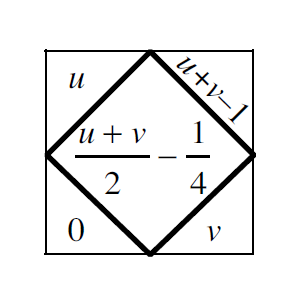

In [518]:
library(IRdisplay)
display_png(file="rombo.png",width = 500,height = 500)

Los valores de $C$ pueden muestrearse sencillamente aprovechando que $C$ es completamente singular, y condicionando respecto de una variable.

Si $u\in I^2$ tenemos de Nelsen que 
$$
\mathbb{P}(V\leq v|U=u) = \dfrac{\partial}{\partial u}C(u,v)
$$
la cual existe casi en todos lados en $I$.

Si $0\leq u \leq \frac{1}{2}$ entonces con base en la imágen anterior y las rectas que forman el rombo (mostradas en la parte escrita), tenemos que

$$
\mathbb{P}(V\leq v|U=u) = \begin{cases}
0, & v<\dfrac{1}{2} - u \\
\dfrac{1}{2}, & \dfrac{1}{2} - u \leq v <u + \dfrac{1}{2} \\
1, & v\geq u + \dfrac{1}{2}
\end{cases}
$$

de lo cual se sigue que si $0\leq u \leq \frac{1}{2}$ entonces

$$
\mathbb{P}(V= v|U=u) = \begin{cases}
\dfrac{1}{2}, & v = \dfrac{1}{2}-u \\
\dfrac{1}{2}, & v = u + \dfrac{1}{2}
\end{cases}
$$

Es análogo ver que si $\frac{1}{2}\leq u \leq 1$, 

$$
\mathbb{P}(V= v|U=u) = \begin{cases}
\dfrac{1}{2}, & v = \dfrac{3}{2}-u \\
\dfrac{1}{2}, & v = u - \dfrac{1}{2}
\end{cases}
$$

Así, muestreando $u$ de una uniforme estándar, y posteriormente definiendo $v$ como uno de los dos casos posibles (los casos dependen de si $u\leq\frac{1}{2}$ o $u\geq\frac{1}{2}$) con igual probabilidad, se obtiene una observación $(u,v)$ de la distribución definida por $C$.

In [287]:
#funcion para muestrear n puntos de la cópula C cirular uniforme
CopCirc = function(n){
    u = runif(n)
    x = runif(n)
    y = runif(n)
    v = (u<=0.5)*1*((0.5-u)*1*(x<=0.5) + (0.5+u)*1*(x>0.5)) + (u>0.5)*1*((1.5-u)*1*(y<=0.5) + (u-0.5)*1*(y>0.5))
    return(data.frame(u,v))
}


A continuación se presenta un scatterplot con 500 puntos muestreados de la cópula circular uniforme.

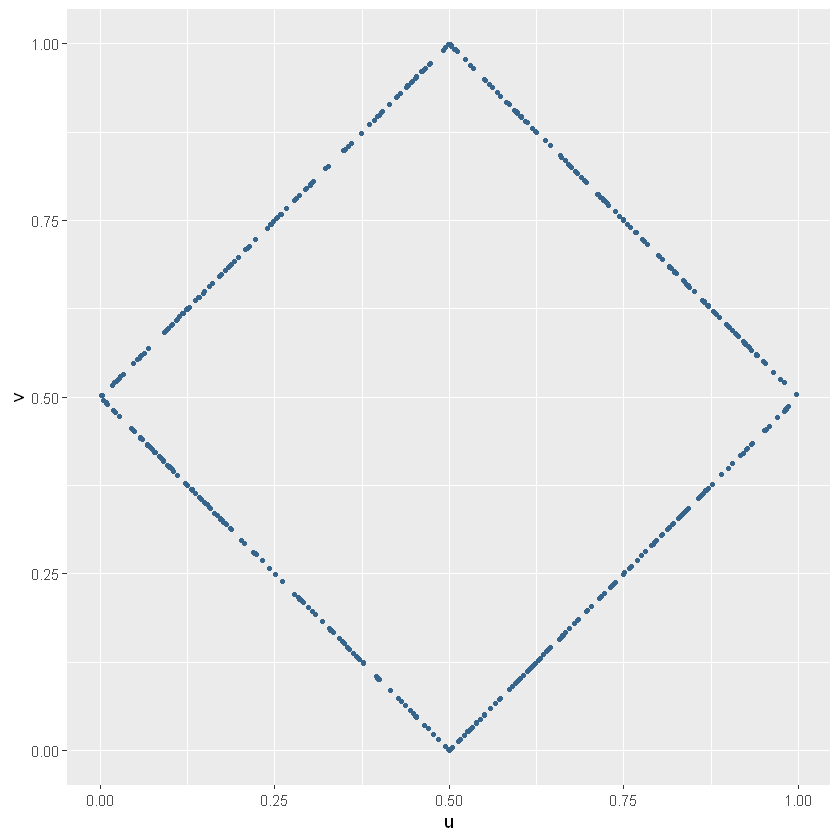

In [459]:
set.seed(2500)
n=500
C=CopCirc(n)
ggplot(C) + geom_point(aes(x=u,y=v),size=1,colour="steelblue4")

Ahora, a este conjunto de puntos se les aplica la transformación 
$$
x=F^{(-1)}(u)=\cos(\pi(1-u)), \qquad y=G^{(-1)}(v) = \cos(\pi(1-v))
$$
con $F$ y $G$ las marginales de la distribución circular uniforme.

Se muestran los puntos obtenidos en un nuevo diagrama de dispersión.

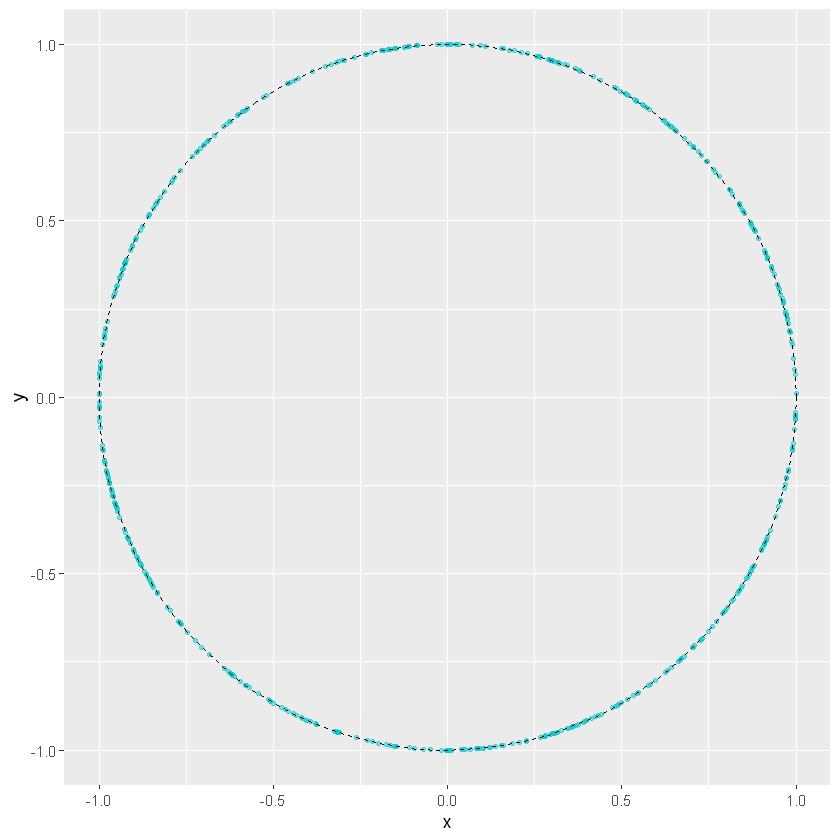

In [460]:
C$x = cos(pi*(1-C$u))
C$y = cos(pi*(1-C$v))
circleFun <- function(center = c(0,0),diameter = 2, npoints = 100){
    r = diameter / 2
    tt <- seq(0,2*pi,length.out = npoints)
    xx <- center[1] + r * cos(tt)
    yy <- center[2] + r * sin(tt)
    return(data.frame(x = xx, y = yy))
}
dat <- circleFun(c(0,0),2,npoints = 100)
ggplot(C) + geom_point(aes(x=x,y=y),size=1,colour="cyan3",alpha=0.5) + geom_path(data=dat,aes(x,y),linetype="dashed",colour="black")

Aplicando una transformación a coordenadas polares, se obtienen los ángulos correspondientes a cada punto y se grafica un histograma normalizado que refleja la uniformidad. A mayor número de puntos las barras tenderán a alcanzar las mismas alturas.

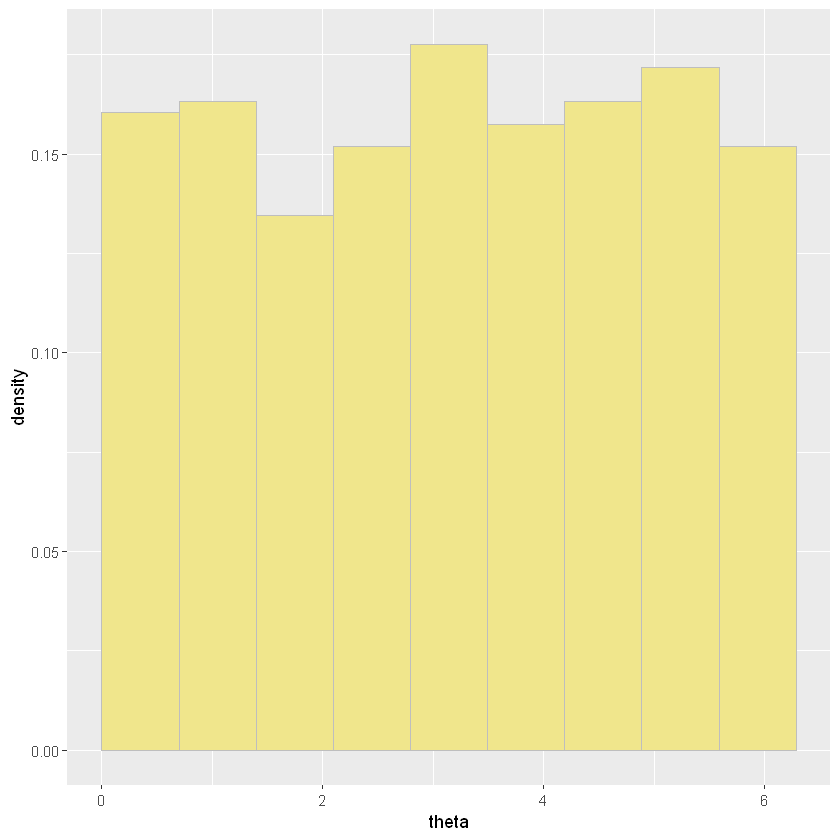

In [511]:
C$theta = ifelse(C$x>0 & C$y>=0, atan(C$y/C$x),ifelse(C$x<0 & C$y>=0,pi - atan(C$y/-C$x),ifelse(C$x<=0 & C$y<0,(3*pi/2)-atan(C$x/C$y),(3*pi/2)+atan(C$x/-C$y))))
ggplot(C) + geom_histogram(aes(x=theta,y=..density..),breaks = seq(0, 2*pi, length.out = 10),colour="gray",fill="khaki")

Por último, siguiendo el ejemplo de Nelsen de la cópula aplicada a marginales Cauchy estándar, 

$$
F(x) = \dfrac{1}{2} + \dfrac{\arctan(x)}{\pi}, \qquad x \in \mathbb{R}
$$

con $G(y)$ la misma función, se tienen las inversas

$$
F^{(-1)}(u) = \tan(\pi(u-1/2)), \qquad u \in I
$$

y similarmente para $G^{(-1)}$.

En la parte escrita se desarrolló este ejemplo y se mostró que la masa se concentra en las hipérbolas dadas por la ecuación
$$
|xy|=1
$$

Se aplican entonces las transformaciones $x=F^{(-1)}(u)$ y $y=G^{(-1)}(v)$, y se muestra el diagram de dispersión resultante

Nota: Se excluyen del gráfico varios puntos extremos que obstaculizan la visualización.

Warning message:
"Removed 70 rows containing missing values (geom_point)."

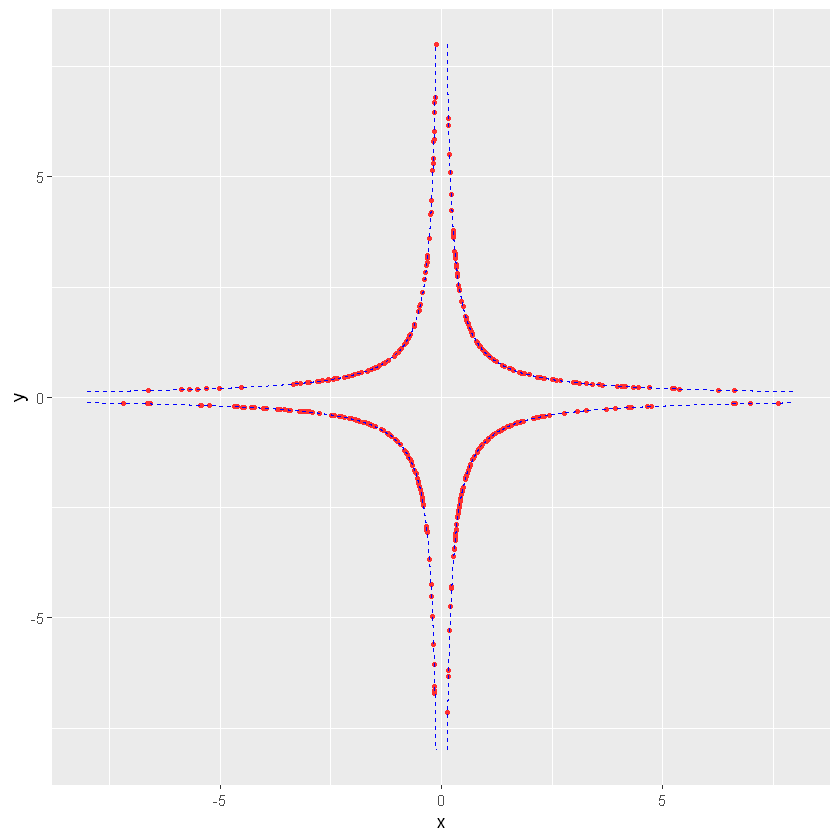

In [491]:
C$x2 = tan(pi*(C$u-0.5))
C$y2 = tan(pi*(C$v-0.5))
d1 = data.frame(x=seq(-8,8,0.0001),y=1/seq(-8,8,0.0001))
d2 = data.frame(x=seq(-8,8,0.0001),y=-1/seq(-8,8,0.0001))
ggplot(C) + geom_point(aes(x=x2,y=y2),size=1,colour="firebrick1") + xlim(c(-8,8)) + ylim(c(-8,8)) + xlab("x") + ylab("y") +
 geom_path(data=d1,aes(x=x,y=y),linetype="dashed",colour="blue") + geom_path(data=d2,aes(x=x,y=y),linetype="dashed",colour="blue")